## 【学习任务】KMeans实现数据聚类

基于 chapter4_task_data 数据，建立 Kmeans 模型，实现数据聚类。  
1、K=2，实现数据聚类，可视化聚类结果、聚类中心；  
2、对比聚类结果与实际类别 (chapter4_task_data_real)，进行结果矫正  
3、建立 KNN 模型，对比分类结果，思考其与聚类结果的差异  
4、修改 Kmeans 迭代次数与初始化参数，查看模型迭代过程中的结果变化  
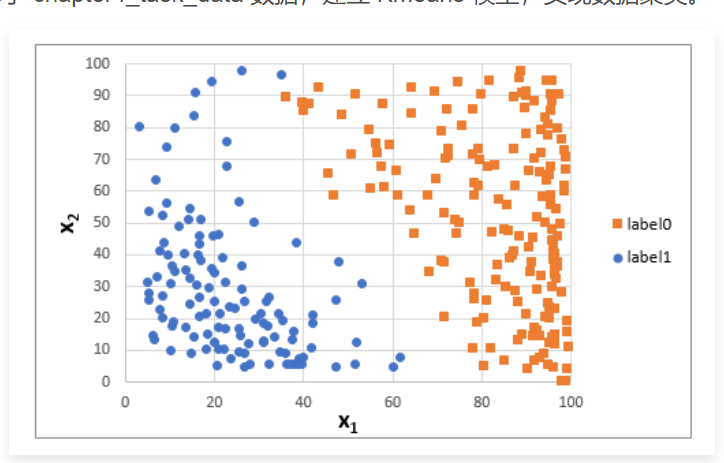

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sys
 
# setting path
sys.path.append('../')

from utils import *

In [2]:
# load the data
data = pd.read_csv('chapter4_task_data.csv')
data.head()


,x1,x2,y
0,82.743436,68.322815,0.0
1,14.437968,54.716677,NaN
2,88.950582,15.264268,NaN
3,78.280878,26.313806,NaN
4,78.210116,58.694901,NaN


In [3]:
# define the X and y
X = data.drop(['y'], axis=1)
y = data.loc[:, 'y']
y.head()
X.head()
print(X.shape)
print(data.iloc[:, 1])

(285, 2)
0      68.322815
1      54.716677
2      15.264268
3      26.313806
4      58.694901
         ...    
280     0.395875
281     0.579437
282    12.099806
283    14.006273
284    23.569654
Name: x2, Length: 285, dtype: float64


K-Means iteration 0 /9
K-Means iteration 1 /9
K-Means iteration 2 /9
K-Means iteration 3 /9
K-Means iteration 4 /9
K-Means iteration 5 /9
K-Means iteration 6 /9
K-Means iteration 7 /9
K-Means iteration 8 /9
K-Means iteration 9 /9


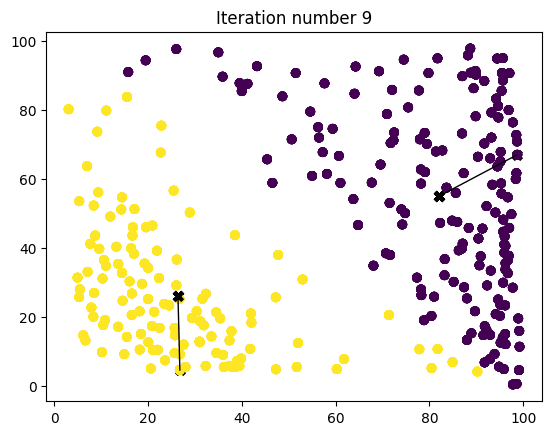

In [4]:
# train the model
from K_means import KMeans_My

km = KMeans_My(n_cluster=2, random_state=1000)
km.fit(X)

In [5]:
print(pd.value_counts(y_predict))


NameError: name 'y_predict' is not defined

In [7]:
# train the k-means model using sklearn

from sklearn.cluster import KMeans

km_s = KMeans(n_clusters=2, random_state=1000)
km_s.fit(X)

c:\Users\yin789\.virtualenvs\ai_course-AGtSknBU\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2, random_state=1000)

In [8]:
y_predict_s = km_s.predict(X)
print(pd.value_counts(y_predict_s))

0    168
1    117
Name: count, dtype: int64


C:\Users\yin789\AppData\Local\Temp\ipykernel_48140\3376808570.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  print(pd.value_counts(y_predict_s))


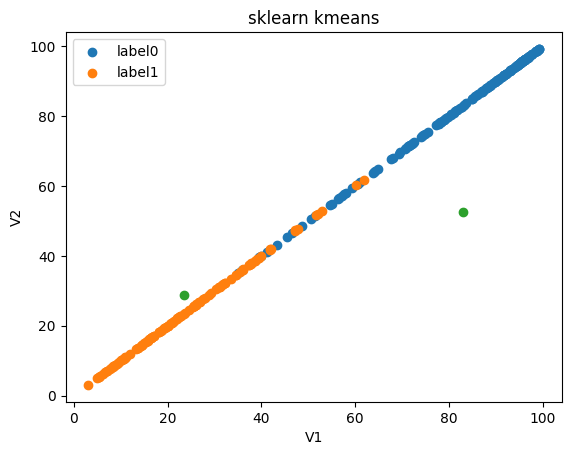

In [9]:
draw_k_means(X, y_predict_s, 'sklearn kmeans', km_s.cluster_centers_)